In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.layers import Dropout
from keras.layers import Dense
from keras.regularizers import l2
from keras.regularizers import l1

#Regression for predicted yardage NFL
def build():
    network = keras.models.Sequential()
    network.add(Dense(256, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l1(5.e-4)))
    network.add(Dense(152, activation='relu'))
    network.add(Dropout(0.1))
    network.add(Dense(54, activation='relu', kernel_regularizer=l2(1.e-3)))
    network.add(Dense(1, activation = 'linear'))
    network.compile(loss='mse', optimizer="adam" ,metrics=['mean_absolute_error'])
    return network

#Data preparation for regression NFL
def data_prep(data):
    data = pd.get_dummies(data)
    y = data['Yards']
    x = data.drop(columns = ['Yards'])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    cols = ['YardLine', 'Distance', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'DefendersInTheBox',
            'X1', 'Y1', 'S1', 'A1', 'Dis1', 'Orientation1', 'Dir1', 'X2', 'Y2', 'S2', 'A2', 'Dis2', 'Orientation2',
            'Dir2', 'X3', 'Y3', 'S3', 'A3', 'Dis3', 'Orientation3', 'Dir3', 'X4', 'Y4', 'S4', 'A4', 'Dis4',
            'Orientation4', 'Dir4', 'X5', 'Y5', 'S5', 'A5', 'Dis5', 'Orientation5', 'Dir5', 'X6', 'Y6', 'S6', 'A6',
            'Dis6', 'Orientation6', 'Dir6', 'X7', 'Y7', 'S7', 'A7', 'Dis7', 'Orientation7', 'Dir7', 'X8', 'Y8', 'S8',
            'A8', 'Dis8', 'Orientation8', 'Dir8', 'X9', 'Y9', 'S9', 'A9', 'Dis9', 'Orientation9', 'Dir9', 'X10', 'Y10',
            'S10', 'A10', 'Dis10', 'Orientation10', 'Dir10', 'X11', 'Y11', 'S11', 'A11', 'Dis11', 'Orientation11',
            'Dir11', 'X12', 'Y12', 'S12', 'A12', 'Dis12', 'Orientation12', 'Dir12', 'X13', 'Y13', 'S13', 'A13', 'Dis13',
            'Orientation13', 'Dir13', 'X14', 'Y14', 'S14', 'A14', 'Dis14', 'Orientation14', 'Dir14', 'X15', 'Y15',
            'S15', 'A15', 'Dis15', 'Orientation15', 'Dir15', 'X16', 'Y16', 'S16', 'A16', 'Dis16', 'Orientation16',
            'Dir16', 'X17', 'Y17', 'S17', 'A17', 'Dis17', 'Orientation17', 'Dir17', 'X18', 'Y18', 'S18', 'A18',
            'Dis18', 'Orientation18', 'Dir18', 'X19', 'Y19', 'S19', 'A19', 'Dis19', 'Orientation19', 'Dir19', 'X20',
            'Y20', 'S20', 'A20', 'Dis20', 'Orientation20', 'Dir20', 'X21', 'Y21', 'S21', 'A21', 'Dis21', 'Orientation21',
            'Dir21', 'X22', 'Y22', 'S22', 'A22', 'Dis22', 'Orientation22', 'Dir22']
    cols = ['YardLine', 'Distance', 'DefendersInTheBox']
    for x in cols:
        mean = x_train[x].mean(axis=0)
        x_train[x] -= mean
        std = x_train[x].std(axis=0)
        x_train[x] /= std
        x_test[x] -= mean
        x_test[x] /= std
        
    y_train /= 10
    y_test /= 10
    return x_train, x_test, y_train, y_test

#Regression k-cross-validation
def cross_valid_reg(k, num_epochs, x_train, y_train, x_test, y_test):
    samples = len(x_train) // k
    val_history = []
    train_history = []
    for i in range(k):
        data = x_train[i * samples: (i + 1) * samples]
        targets = y_train[i * samples: (i + 1) * samples]
        partial_train_data = np.concatenate([x_train[:i * samples], x_train[(i + 1) * samples:]],axis=0)
        partial_train_targets = np.concatenate([y_train[:i * samples],y_train[(i + 1) * samples:]],axis=0)
        model = build()
        if i == 0:
            print('Input size: ', x_train.shape)
            print(model.summary())
        hist = model.fit(partial_train_data, partial_train_targets, validation_data=(data, targets),
                         epochs=num_epochs, batch_size=100, verbose=0)
        loss_history1 = hist.history['val_loss']
        loss_history2 = hist.history['loss']
        val_history.append(loss_history1)
        train_history.append(loss_history2)
        
    val_history = [np.mean([x[i] for x in val_history]) for i in range(num_epochs)]
    train_history = [np.mean([x[i] for x in train_history]) for i in range(num_epochs)]
    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 24})
    plt.plot(range(1, len(val_history) + 1), val_history)
    plt.plot(range(1, len(train_history) + 1), train_history)
    plt.xlabel('Epochs')
    plt.ylabel('loss_function')
    plt.legend(['Validation', 'Training'])
    plt.savefig('YardsNew.png')
    plt.show()
    _,mae = model.evaluate(x_test, y_test)
    print('Mean Absolute Error of the network is ', mae)
    with open('YardsNew.txt', 'w') as outfile:
        for x in range(len(val_history)):
            print(x, ' ', val_history[x], ' ', train_history[x], file=outfile)
    
    return model

In [2]:
df = pd.read_csv('data\DataBowl.csv')

C:\Users\filip\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df.drop(columns = ['GameId', 'DisplayName', 'JerseyNumber', 'Season', 'NflIdRusher', 'TimeHandoff','TimeSnap',
                        'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate','PlayerCollegeName', 'Position', 'Week', 
                        'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather','Temperature', 'Humidity', 
                        'WindSpeed', 'WindDirection', 'NflId', 'GameClock', 'PlayDirection'])

df['FieldPosition'] = df['FieldPosition'].where(df['FieldPosition'] == df['HomeTeamAbbr'], 'away')
df['FieldPosition'] = df['FieldPosition'].mask(df['FieldPosition'] == df['HomeTeamAbbr'], 'home')
df['PossessionTeam'] = df['PossessionTeam'].where(df['PossessionTeam'] == df['HomeTeamAbbr'], 'away')
df['PossessionTeam'] = df['PossessionTeam'].mask(df['PossessionTeam'] == df['HomeTeamAbbr'], 'home')

df = df.drop(columns = ['HomeTeamAbbr', 'VisitorTeamAbbr'])

In [4]:
player = df.drop(columns = ['YardLine', 'Quarter', 'Down',
       'Distance', 'FieldPosition', 'HomeScoreBeforePlay',
       'VisitorScoreBeforePlay','DefendersInTheBox','Yards', 'OffenseFormation', 'OffensePersonnel',
                        'DefensePersonnel'])
play = df.drop(columns = ['Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir'])

In [5]:
play = play.drop_duplicates()

In [6]:
players = []
for i in range(22):
    players.append(player.iloc[i::22].reset_index(drop=True))

data = play
data1 = players[0]
play['YardLine'] = play['YardLine'].where(play['PossessionTeam']==play['FieldPosition'], play['YardLine'])
play['YardLine'] = play['YardLine'].mask(play['PossessionTeam']==play['FieldPosition'], 100-play['YardLine'])
play = play.drop(columns = ['FieldPosition'])

for i in range(len(players)):
    if i > 0:
        data1 = data1.join(players[i].drop(columns = ['PlayId']), lsuffix = str(i), rsuffix = str(i+1))
    
data = data.set_index('PlayId').join(data1.set_index('PlayId')).reset_index(drop = True)

In [7]:
data = play
data = data.drop(columns = ['PossessionTeam', 'PlayId', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay'])
data

,YardLine,Quarter,Down,Distance,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,Yards
0,65,1,3,2,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",8
22,57,1,1,10,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",3
44,35,1,1,10,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,"2 DL, 3 LB, 6 DB",5
66,2,1,2,2,JUMBO,"6 OL, 2 RB, 2 TE, 0 WR",9.0,"4 DL, 4 LB, 3 DB",2
88,75,1,1,10,SHOTGUN,"1 RB, 3 TE, 1 WR",7.0,"3 DL, 2 LB, 6 DB",7
...,...,...,...,...,...,...,...,...,...
682044,54,4,1,10,PISTOL,"2 RB, 2 TE, 1 WR",8.0,"4 DL, 3 LB, 4 DB",1
682066,53,4,2,9,PISTOL,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 3 LB, 5 DB",1
682088,13,4,1,10,SINGLEBACK,"1 RB, 1 TE, 3 WR",8.0,"3 DL, 3 LB, 5 DB",1
682110,63,4,1,10,PISTOL,"2 RB, 1 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",1


In [8]:
dic = {'home' : 1, 'away' : 0}
data = data.replace(dic)
data = data.dropna()

data.to_csv("NFLwFormation.csv", index=False)

In [9]:
data.describe()

,YardLine,Quarter,Down,Distance,DefendersInTheBox,Yards
count,31003.000000,31003.000000,31003.000000,31003.000000,31003.000000,31003.000000
mean,54.001193,2.511305,1.517337,8.318937,6.910299,4.227784
std,24.981186,1.141083,0.676579,3.818973,0.985076,6.450362
min,1.000000,1.000000,1.000000,1.000000,2.000000,-15.000000
25%,35.000000,1.000000,1.000000,6.000000,6.000000,1.000000
50%,59.000000,3.000000,1.000000,10.000000,7.000000,3.000000
75%,75.000000,4.000000,2.000000,10.000000,7.000000,6.000000
max,99.000000,5.000000,4.000000,40.000000,11.000000,99.000000


Input size:  (24802, 117)
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 256)               30208     
_________________________________________________________________
dense_117 (Dense)            (None, 152)               39064     
_________________________________________________________________
dropout_29 (Dropout)         (None, 152)               0         
_________________________________________________________________
dense_118 (Dense)            (None, 54)                8262      
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 55        
Total params: 77,589
Trainable params: 77,589
Non-trainable params: 0
_________________________________________________________________
None


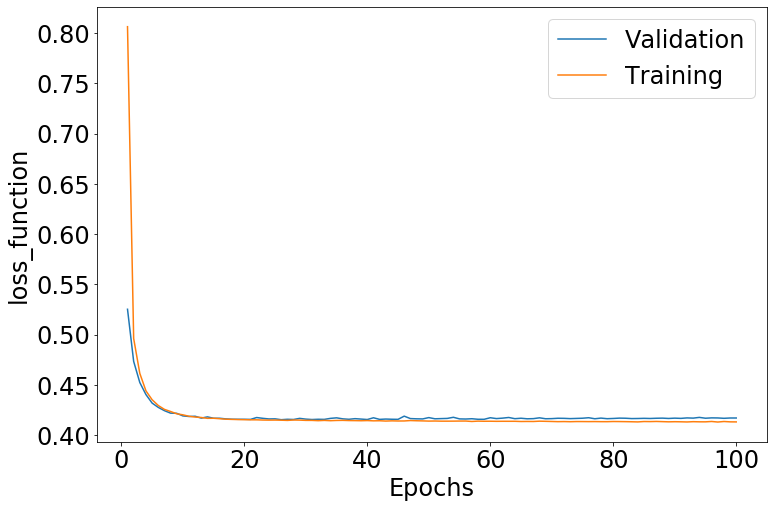

194/194 [==============================] - 0s 1ms/step - loss: 0.3981 - mean_absolute_error: 0.3765
Mean Absolute Error of the network is  0.37645021080970764
Guessing that every play results in set's average gain generates mean absolute error:  0.36563986775263063


In [29]:
data = pd.read_csv("data\\NFLwFormation.csv")
x_train, x_test, y_train, y_test = data_prep(data)

meany = y_train.median()
error = pd.Series(y_train-meany)
error = abs(error)
benchmark = error.mean()

model = cross_valid_reg(3, 100, x_train, y_train, x_test, y_test)
print('Guessing that every play results in set\'s average gain generates mean absolute error: ', benchmark)

C:\Users\filip\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


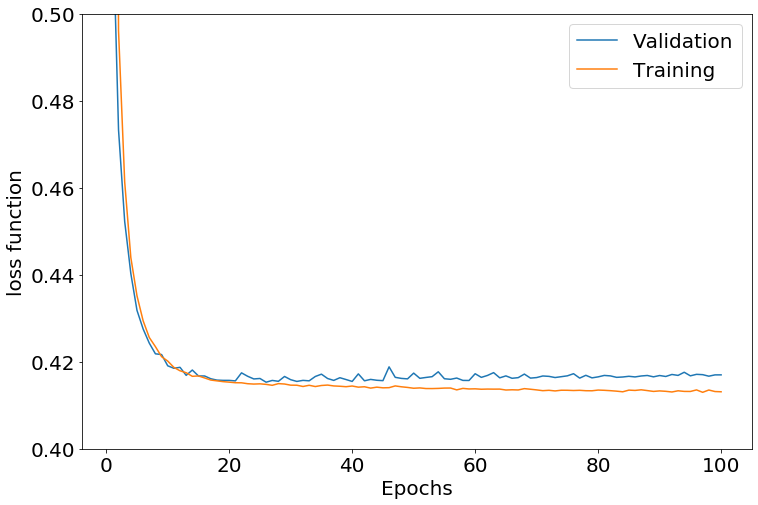

In [4]:
plot = pd.read_csv('YardsNew.txt', header = None, sep = '  ', names = ['Epochs', 'Validation', 'Training'])
plot = plot.set_index(['Epochs'])

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})
plt.plot(range(1, len(plot['Validation']) + 1), plot['Validation'])
plt.plot(range(1, len(plot['Training']) + 1), plot['Training'])
plt.xlabel('Epochs')
plt.ylabel('loss function')
plt.legend(['Validation', 'Training'])
plt.ylim([0.4,0.5])
plt.savefig('YardsNew.png')
plt.show()